/home/nao/.pyenv/versions/3.6.4/envs/keras/lib/python3.6/site-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '
/home/nao/.pyenv/versions/3.6.4/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(input_dim=20000, output_dim=100, input_length=180, embeddings_initializer="glorot_uniform")`
/home/nao/.pyenv/versions/3.6.4/envs/keras/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 28s 1ms/step - loss: 0.6641 - acc: 0.5946 - val_loss: 0.5839 - val_acc: 0.7273
Epoch 2/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.4718 - acc: 0.7848 - val_loss: 0.4111 - val_acc: 0.8217
Epoch 3/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.3721 - acc: 0.8417 - val_loss: 0.3813 - val_acc: 0.8400
Epoch 4/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.2707 - acc: 0.8924 - val_loss: 0.4937 - val_acc: 0.7829
Epoch 5/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.1966 - acc: 0.9273 - val_loss: 0.4154 - val_acc: 0.8245
Epoch 6/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.1341 - acc: 0.9553 - val_loss: 0.5201 - val_acc: 0.7789
Epoch 7/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.0710 - acc: 0.9808 - val_loss: 0.4699 - val_acc

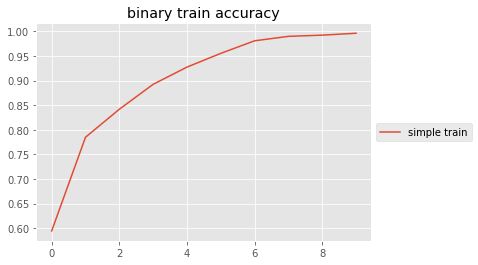

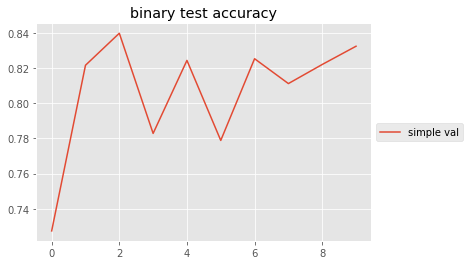

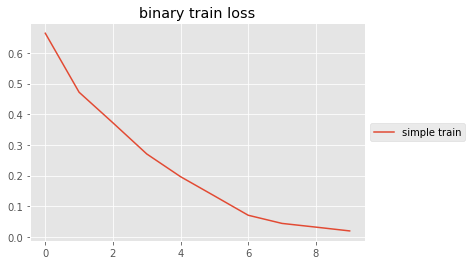

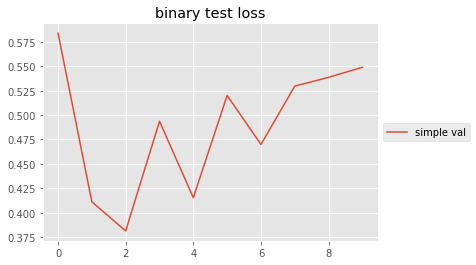

In [4]:
%matplotlib inline

from keras.models import Sequential
from keras.datasets import imdb
from keras.layers import Dense, Activation, Embedding, LSTM, GRU, SimpleRNN
from keras.optimizers import Adadelta
from keras.utils import np_utils
#from keras.utils.visualize_util import model_to_dot, plot
from keras.preprocessing import sequence
import numpy as np
from IPython.display import SVG

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
np.random.seed(13)
nb_epoch = 10

max_features = 20000

(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
maxlen=180
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=100, init='glorot_uniform', input_length=maxlen))
model.add(SimpleRNN(20, return_sequences=False))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

simple = model.fit(X_train, y_train, batch_size=256, nb_epoch=nb_epoch,
                   validation_data=(X_test, y_test))

#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


x = range(nb_epoch)
plt.plot(x, simple.history['acc'], label="simple train")
plt.title("binary train accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, simple.history['val_acc'], label="simple val")
plt.title("binary test accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, simple.history['loss'], label="simple train")
plt.title("binary train loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
                        
plt.plot(x, simple.history['val_loss'], label="simple val")
plt.title("binary test loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()